# **Importing Necessary Libraries**

In [1]:
  pip install emnist


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow import keras
import tensorflow_datasets as tfds
import emnist
import keras_tuner as kt
import seaborn as sns
from keras_tuner.tuners import GridSearch
from keras_tuner.tuners import RandomSearch
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
from tensorflow.keras.callbacks import History


In [4]:
# Setting seed
tf.random.set_seed(42)
np.random.seed(42)
seed_value = 42

# **Loading the Data**

In [5]:
# Loading training data
X_train, y_train = emnist.extract_samples('balanced','train')

In [6]:
# Loading testing data
X_test, y_test = emnist.extract_samples('balanced','test')

In [7]:
# Number of training examples
X_train.shape[0]

112800

In [8]:
# Number of Testing examples
X_test.shape[0]

18800

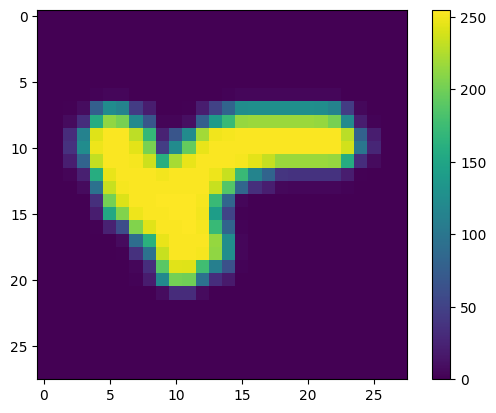

In [9]:
# Visualising the first sample
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

As we can see that the pixels goes as high as 255, we need normalize them in order so that every image values comes between 0 and 1.

In [10]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test/ 255.0

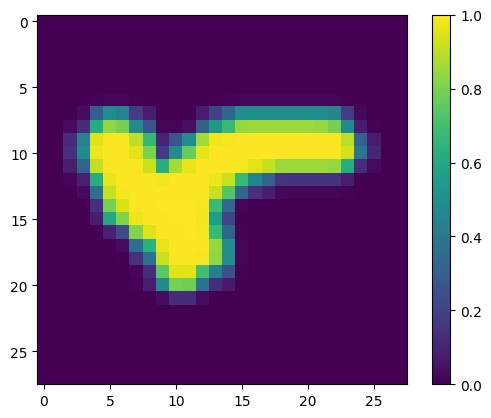

In [11]:
# Plotting figure again to see the maximum values of pixels
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [12]:
# Define the mapping of class labels
emnist_mapping = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
           10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
           20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
           30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e',
           40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


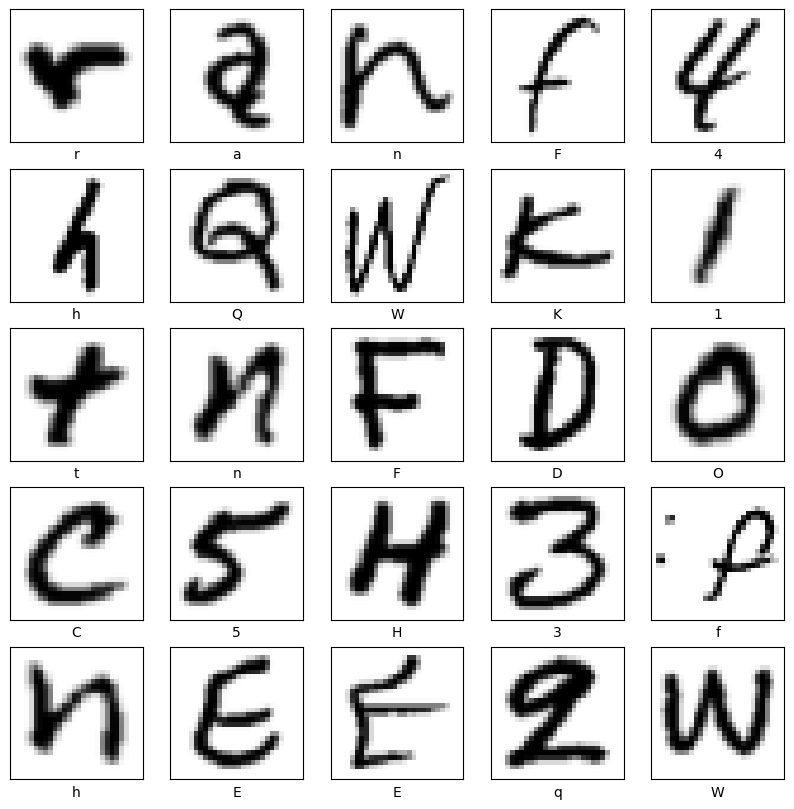

In [13]:
# Visualising the few images from training sets along with labels
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i],cmap=plt.cm.binary)
  plt.xlabel(emnist_mapping[y_train[i]])
plt.show()

# **MLP**

In [ ]:
# Multi Layer Perceptron
# Base Model

# Setting up the layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(47)
])

#Compiling the Model
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

# Training the Model
model.fit(X_train,y_train, epochs = 21)

# Evaluating accuracy on the training set
train_loss, train_acc = model.evaluate(X_train,y_train,verbose=2)
print('\nTraining accuracy:', train_acc)

# Evaluate accuracy on testing set
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/21
3525/3525 [==============================] - 16s 3ms/step - loss: 0.9298 - accuracy: 0.7154
Epoch 2/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.5811 - accuracy: 0.8062
Epoch 3/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.5036 - accuracy: 0.8277
Epoch 4/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.4590 - accuracy: 0.8405
Epoch 5/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.4287 - accuracy: 0.8489
Epoch 6/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.4012 - accuracy: 0.8557
Epoch 7/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.3834 - accuracy: 0.8604
Epoch 8/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.3666 - accuracy: 0.8655
Epoch 9/21
3525/3525 [==============================] - 9s 3ms/step - loss: 0.3546 - accuracy: 0.8691
Epoch 10/21
3525/3525 [==============================] - 9s 2ms/step - loss: 0.34

So, we have obtained 90.31% accuracy on training set and 82.87% on testing set.

We need to tune the hyperparameters the parameters so that our model performs better.

# **Hyperparamter Tunning MLP**

 ***Finding the best activation function***

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))

  # Tune the activation fucntion
  hp_activation_function = hp.Choice('activation', values = ['relu','elu','tanh'])
  model.add(keras.layers.Dense(units = 128, activation = hp_activation_function))
  model.add(keras.layers.Dense(units = 128, activation = hp_activation_function))
  model.add(keras.layers.Dense(units = 128, activation = hp_activation_function))
  model.add(keras.layers.Dense(units = 47))

  #Compiling the model
  model.compile(optimizer= 'adam',
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.GridSearch(model_builder,
                      objective = 'val_accuracy',
                      max_trials = 10,
                      seed = seed_value
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train,y_train,epochs = 21,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The best activation function: {best_hps.get('activation')}")

Trial 3 Complete [00h 01m 31s]
val_accuracy: 0.8192375898361206

Best val_accuracy So Far: 0.8265366554260254
Total elapsed time: 00h 05m 03s
The best activation function: elu


Best activation fucntion is **"elu"**

***Finding the best optimizer function***

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))

  # Tune the activation fucntion
  hp_activation_function = hp.Choice('activation', values = ['elu'])
  model.add(keras.layers.Dense(units = 128, activation = hp_activation_function))
  model.add(keras.layers.Dense(units = 128, activation = hp_activation_function))
  model.add(keras.layers.Dense(units = 128, activation = hp_activation_function))
  model.add(keras.layers.Dense(units = 47))

  #Compiling the model
  hp_optimizer_function = hp.Choice('optimizer',values = ['adam','SGD','RMSprop'])
  model.compile(optimizer=hp_optimizer_function,
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.GridSearch(model_builder,
                      objective = 'val_accuracy',
                      max_trials = 10
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train,y_train,epochs = 21,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The best optimizer function is: {best_hps.get('optimizer')}")

Trial 3 Complete [00h 02m 05s]
val_accuracy: 0.8263593316078186

Best val_accuracy So Far: 0.8283687829971313
Total elapsed time: 00h 08m 36s
The best optimizer function is: adam


Best optimizer is **'adam'**

**Finding the best learning rate schedule**

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  model.add(keras.layers.Dense(units = 47))

  # Tune the learning rate
  lr_function = hp.Choice('learning rate scheduler',['inverse','exp'])
  if lr_function == 'exp':
    decay_step = hp.Choice('decay_step',[1000,5000,10000])
    decay_rate = hp.Choice('decay_rate', [0.1,0.5,0.9])
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps = decay_step,
        decay_rate = decay_rate,
        staircase = True
    )
  else:
    decay_step = hp.Choice('decay_step',[1000,5000,10000])
    decay_rate = hp.Choice('decay_rate', [0.1,0.5,0.9])
    learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = decay_step,
        decay_rate = decay_rate
    )
  #Compiling the model
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.GridSearch(model_builder,
                      objective = 'val_accuracy',
                      max_trials = 30,
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train,y_train,epochs = 21,validation_split=0.2,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print(best_hps.get('learning rate scheduler'))
print(best_hps.get('decay_step'))
print(best_hps.get('decay_rate'))





Trial 18 Complete [00h 01m 23s]
val_accuracy: 0.7076241374015808

Best val_accuracy So Far: 0.8340425491333008
Total elapsed time: 00h 48m 57s
inverse
1000
0.9


Best learning rate scheduler is **inverse** with 1000 decay steps and 0.9 decay rate.

**Exploring Batch Normalization**

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  if hp.Boolean('batchnorm'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  if hp.Boolean('batchnorm'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  if hp.Boolean('batchnorm'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units = 47))

  learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
      initial_learning_rate = 0.01,
      decay_steps = 1000,
      decay_rate = 0.9

  )
  #Compiling the model
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.GridSearch(model_builder,
                      objective = 'val_accuracy',
                      max_trials = 30,
                       
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train,y_train,epochs = 21,validation_split=0.2,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('batchnorm'))


Trial 2 Complete [00h 03m 06s]
val_accuracy: 0.8523049354553223

Best val_accuracy So Far: 0.8523049354553223
Total elapsed time: 00h 04m 47s
True


Batch Normalization : **True**

**Exploring L1 and L2 Regularization**

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(units = 128, activation = 'elu',kernel_regularizer = keras.regularizers.l1_l2(l1=hp.Choice('L1 Regularization',values = [0.0,0.01,0.001]), l2 = hp.Choice('L2 Regularization',values = [0.0,0.01,0.001]))))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units = 128, activation = 'elu',kernel_regularizer = keras.regularizers.l1_l2(l1=hp.Choice('L1 Regularization',values = [0.0,0.01,0.001]), l2 = hp.Choice('L2 Regularization',values = [0.0,0.01,0.001]))))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units = 128, activation = 'elu',kernel_regularizer = keras.regularizers.l1_l2(l1=hp.Choice('L1 Regularization',values = [0.0,0.01,0.001]), l2 = hp.Choice('L2 Regularization',values = [0.0,0.01,0.001]))))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(units = 47))

  # learning rate
  learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9
    )
  #Compiling the model
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.RandomSearch(model_builder,
                      objective = 'val_accuracy',
                      max_trials = 10,
                       
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train,y_train,epochs = 20,validation_split=0.2,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('L1 Regularization'))

print(best_hps.get('L2 Regularization'))




0.0
0.0


No **Regularization**.

**Exploring DropOut**

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(hp.Choice('Dropout',values = [0.0,0.1,0.3,0.4,0.5])))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(hp.Choice('Dropout',values = [0.0,0.1,0.3,0.4,0.5])))
  model.add(keras.layers.Dense(units = 128, activation = 'elu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(hp.Choice('Dropout',values = [0.0,0.1,0.3,0.4,0.5])))
  model.add(keras.layers.Dense(units = 47))

  # learning rate
  learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9
    )
  #Compiling the model
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.RandomSearch(model_builder,
                      objective = 'val_accuracy',
                      max_trials = 12,
                       
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train,y_train,epochs = 21,validation_split=0.2,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('Dropout'))





0.1


**DropOut : 0.1**

#Training Model using Best Hyperparameters MLP




In [17]:
# Multi Layer Perceptron
perfect_model_MLP = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation = 'elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation = 'elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(47)
])

# learning rate
learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9)

# Compiling the Model
perfect_model_MLP.compile(tf.keras.optimizers.Adam(learning_rate = learning_rate),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

start_time = time.time()

#Creating an instance of History Class
history = History()

# Training the Model
perfect_model_MLP.fit(X_train,y_train, epochs = 21,callbacks = [history])

end_time = time.time()

# Model Accuracy on Training 
train_loss, train_acc = perfect_model_MLP.evaluate(X_train,y_train,verbose=2)
print('\nTraining loss:', train_loss)
print('\nTraining accuracy:', train_acc)

# Model Accuracy on Testing
test_loss, test_acc = perfect_model_MLP.evaluate(X_test,y_test,verbose=2)
print('\nTest loss:', test_loss)
print("\nTesting accuracy:", test_acc)

# Time Taken in Training
training_time = end_time - start_time
print("\nTraining Time :",training_time,' seconds')


Epoch 1/21
3525/3525 [==============================] - 17s 4ms/step - loss: 0.9885 - accuracy: 0.6923
Epoch 2/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.6791 - accuracy: 0.7771
Epoch 3/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.6089 - accuracy: 0.7982
Epoch 4/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.5702 - accuracy: 0.8080
Epoch 5/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.5464 - accuracy: 0.8156
Epoch 6/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.5321 - accuracy: 0.8188
Epoch 7/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.5222 - accuracy: 0.8221
Epoch 8/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.5111 - accuracy: 0.8264
Epoch 9/21
3525/3525 [==============================] - 14s 4ms/step - loss: 0.5019 - accuracy: 0.8270
Epoch 10/21
3525/3525 [==============================] - 14s 4ms/step - l

Training Loss: 0.31

Training Accuracy : 0.8862

Test Loss : 0.42

Testing Accuracy : 0.8580

Training time : 298.95 seconds

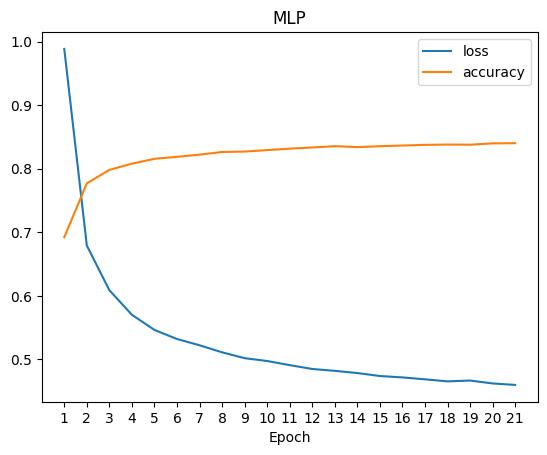

In [18]:
# Plotting the loss function and accuracy with respect to epoch
loss = history.history['loss']
accuracy = history.history['accuracy']

plt.plot(loss,label = 'loss')
plt.plot(accuracy, label = 'accuracy')
plt.xlabel('Epoch')
plt.xticks(range(len(loss)), range(1,len(loss)+1))
plt.legend()
plt.title('MLP')
plt.show()

#CNN

In [14]:
# Reshaping the data to fit CNN model
X_train_CNN = X_train.reshape((X_train.shape[0],28,28,1))
X_test_CNN = X_test.reshape((X_test.shape[0],28,28,1))

In [ ]:
X_train_CNN[0].shape

(28, 28, 1)

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
# Base Model

# Define the architecture
model_CNN = models.Sequential()
model_CNN.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_CNN.add(layers.MaxPooling2D((2,2)))
model_CNN.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model_CNN.add(layers.MaxPooling2D((2,2)))
model_CNN.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(64,activation='relu'))
model_CNN.add(layers.Dense(47))

# Compiling the model
model_CNN.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])


In [ ]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:
# Training the model
model_CNN.fit(X_train_CNN,y_train,epochs = 10)

# Evaluating it on training set
train_loss,train_acc = model_CNN.evaluate(X_train,y_train)
print("Training Accuracy: ", train_acc)

# Evaluating it on test set
test_loss, test_acc = model_CNN.evaluate(X_test_CNN,y_test)
print("Test Accuracy: ", test_acc)

Epoch 1/10
3525/3525 [==============================] - 13s 3ms/step - loss: 0.7129 - accuracy: 0.7754
Epoch 2/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.4065 - accuracy: 0.8574
Epoch 3/10
3525/3525 [==============================] - 12s 3ms/step - loss: 0.3513 - accuracy: 0.8734
Epoch 4/10
3525/3525 [==============================] - 12s 3ms/step - loss: 0.3209 - accuracy: 0.8824
Epoch 5/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.2986 - accuracy: 0.8881
Epoch 6/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.2794 - accuracy: 0.8932
Epoch 7/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.2626 - accuracy: 0.8988
Epoch 8/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.2488 - accuracy: 0.9033
Epoch 9/10
3525/3525 [==============================] - 11s 3ms/step - loss: 0.2354 - accuracy: 0.9065
Epoch 10/10
3525/3525 [==============================] - 7s 2ms/step - lo

Training Accuracy : 91.99%

Testing Accuracy : 87.44%

#Hyperparamter Tunning

**Activation Function**

In [ ]:
def model_builder_1(hp):
  hp_activation_function = hp.Choice('activation', values = ['relu','elu','tanh','sigmoid'])
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3), activation = hp_activation_function,input_shape = (28,28,1)))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = hp_activation_function))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = hp_activation_function))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation = hp_activation_function))
  model.add(keras.layers.Dense(47))

  #Compiling the model
  model.compile(optimizer = 'adam',
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.GridSearch(model_builder_1,
                      objective = 'val_accuracy',
                      max_trials = 20
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train_CNN,y_train,epochs = 10,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The best activation: {best_hps.get('activation')}")


Trial 4 Complete [00h 01m 55s]
val_accuracy: 0.8566193580627441

Best val_accuracy So Far: 0.8699468374252319
Total elapsed time: 00h 07m 39s
The best activation: relu


Best activation function '**ReLU'**

**Optimizers**

In [ ]:
def model_builder_2(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation = 'relu'))
  model.add(keras.layers.Dense(47))

  #Compiling the model
  hp_optimizer_function = hp.Choice('optimizer',values = ['adam','SGD','RMSprop'])
  model.compile(optimizer = hp_optimizer_function,
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.GridSearch(model_builder_2,
                      objective = 'val_accuracy',
                      max_trials = 20
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train_CNN,y_train,epochs = 10,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The best optimizer: {best_hps.get('optimizer')}")


Trial 3 Complete [00h 01m 48s]
val_accuracy: 0.8764775395393372

Best val_accuracy So Far: 0.8764775395393372
Total elapsed time: 00h 05m 29s
The best optimizer: RMSprop


Best optimizer **RMSprop**

**Learning Rate**

In [ ]:
def model_builder_3(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation ='relu'))
  model.add(keras.layers.Dense(47))

  # Learning Rate
  lr_function = hp.Choice('learning rate scheduler',['inverse','exp'])
  if lr_function == 'exp':
    decay_step = hp.Choice('decay_step',[1000,5000,10000])
    decay_rate = hp.Choice('decay_rate', [0.1,0.5,0.9])
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps = decay_step,
        decay_rate = decay_rate,
        staircase = True
    )
  else:
    decay_step = hp.Choice('decay_step',[1000,5000,10000])
    decay_rate = hp.Choice('decay_rate', [0.1,0.5,0.9])
    learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = decay_step,
        decay_rate = decay_rate
    )


  #Compiling the model
  model.compile(tf.keras.optimizers.RMSprop(learning_rate = learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.RandomSearch(model_builder_3,
                      objective = 'val_accuracy',
                      max_trials = 20
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train_CNN,y_train,epochs = 10,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The best learning rate: {best_hps.get('learning rate scheduler')}")
print(f"The best decay step: {best_hps.get('decay_step')}")
print(f"The best decay rate {best_hps.get('decay_rate')}")


Trial 18 Complete [00h 01m 07s]
val_accuracy: 0.7978723645210266

Best val_accuracy So Far: 0.8643321394920349
Total elapsed time: 00h 30m 42s
The best learning rate: inverse
The best decay step: 1000
The best decay rate 0.9


Best Learning rate came out to be **InverseTimeDecay** with 1000 decay steps and 0.9 decay rate.

**Batch Normalization**

In [ ]:
def model_builder_4(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)))
  if hp.Boolean('batchnorm_1'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  if hp.Boolean('batchnorm_2'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  if hp.Boolean('batchnorm_3'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation = 'relu'))
  if hp.Boolean('batchnorm_4'):
    model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(47))


  #learning rate
  learning_rate = learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9)


  #Compiling the model
  model.compile(tf.keras.optimizers.RMSprop(learning_rate = learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.RandomSearch(model_builder_4,
                      objective = 'val_accuracy',
                      max_trials = 20
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train_CNN,y_train,epochs = 10,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"batch norm 1: {best_hps.get('batchnorm_1')}")
print(f"batch norm 2: {best_hps.get('batchnorm_2')}")
print(f"batch norm 3: {best_hps.get('batchnorm_3')}")
print(f"batch norm 4: {best_hps.get('batchnorm_4')}")



Trial 16 Complete [00h 02m 20s]
val_accuracy: 0.882033109664917

Best val_accuracy So Far: 0.8841903209686279
Total elapsed time: 00h 33m 02s
batch norm 1: False
batch norm 2: True
batch norm 3: False
batch norm 4: True


Batch Normalization **True** after 2nd convolution layer and Hidden Layer

**L1 and L2 Regularization**

In [ ]:
def model_builder_5(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation = 'relu',kernel_regularizer = keras.regularizers.l1_l2(l1=hp.Choice('L1 Regularization',values = [0.0,0.01]), l2 = hp.Choice('L2 Regularization',values = [0.0,0.01]))))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(47))


  #learning rate
  learning_rate = learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9)


  #Compiling the model
  model.compile(tf.keras.optimizers.RMSprop(learning_rate = learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.RandomSearch(model_builder_5,
                      objective = 'val_accuracy',
                      max_trials = 20
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train_CNN,y_train,epochs = 10,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"L1 Regularization: {best_hps.get('L1 Regularization')}")
print(f"L2 Regularization: {best_hps.get('L2 Regularization')}")




Trial 4 Complete [00h 02m 11s]
val_accuracy: 0.8440898060798645

Best val_accuracy So Far: 0.8813830018043518
Total elapsed time: 00h 08m 48s
L1 Regularization: 0.0
L2 Regularization: 0.0


No **Regularization**

**DropOut**

In [ ]:
def model_builder_6(hp):
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation ='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)))
  model.add(keras.layers.Dense(47))


  #learning rate
  learning_rate = learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9)


  #Compiling the model
  model.compile(tf.keras.optimizers.RMSprop(learning_rate = learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Searching best hyperparameters
tuner = kt.RandomSearch(model_builder_6,
                      objective = 'val_accuracy',
                      max_trials = 20
                      )

stop_early = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience = 5)


tuner.search(X_train_CNN,y_train,epochs = 10,validation_split=0.3,callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"dropout_1: {best_hps.get('dropout')}")




dropout_1: 0.4


DropOut - **0.4**

# **Fitting the model with best hyperparameters CNN**

In [15]:
# Definning the CNN architecture
perfect_model_CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate = 0.4),
    tf.keras.layers.Dense(47)
]) 


#learning rate
learning_rate = learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(
        initial_learning_rate = 0.01,
        decay_steps = 1000,
        decay_rate = 0.9)
  
# Compiling the model
perfect_model_CNN.compile(tf.keras.optimizers.RMSprop(learning_rate = learning_rate),
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

# start time
start_time = time.time()

# Creating an History instance
history_CNN = History()

# train model
perfect_model_CNN.fit(X_train_CNN,y_train,epochs =10,callbacks=[history_CNN])

# end time
end_time = time.time()

# total time
total_time = end_time - start_time

# Evaluate model on training set
train_loss, train_acc = perfect_model_CNN.evaluate(X_train_CNN, y_train)
print('\nTraining loss:', train_loss)
print('\nTrain accuracy:', train_acc)

#Total Time 
print('\nTotal Time taken in Training: ',total_time,'seconds')

# Evaluate model on test set
test_loss, test_acc = perfect_model_CNN.evaluate(X_test_CNN, y_test)
print('\nTesting loss:', test_loss)
print('\nTest accuracy:', test_acc)



Epoch 1/10
3525/3525 [==============================] - 25s 4ms/step - loss: 0.7179 - accuracy: 0.7734
Epoch 2/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.4698 - accuracy: 0.8457
Epoch 3/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.4262 - accuracy: 0.8585
Epoch 4/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.4045 - accuracy: 0.8662
Epoch 5/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.3901 - accuracy: 0.8699
Epoch 6/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.3800 - accuracy: 0.8741
Epoch 7/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.3720 - accuracy: 0.8760
Epoch 8/10
3525/3525 [==============================] - 14s 4ms/step - loss: 0.3662 - accuracy: 0.8772
Epoch 9/10
3525/3525 [==============================] - 13s 4ms/step - loss: 0.3623 - accuracy: 0.8777
Epoch 10/10
3525/3525 [==============================] - 7s 2ms/step - lo

Training loss : 0.27

Train Accuracy : 90.29%

Testing loss : 0.3425

Testing Accuracy : 88.36%

Time Taken : 148.28 seconds

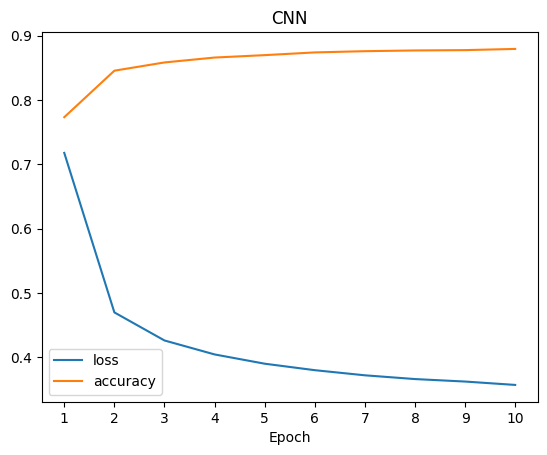

In [16]:
# Plotting the loss function and accuracy with respect to epoch
loss_CNN = history_CNN.history['loss']
accuracy_CNN = history_CNN.history['accuracy']

plt.plot(loss_CNN,label = 'loss')
plt.plot(accuracy_CNN, label = 'accuracy')
plt.xlabel('Epoch')
plt.xticks(range(len(loss_CNN)), range(1,len(loss_CNN)+1))
plt.legend()
plt.title('CNN')
plt.show()

# MLP VS CNN

In [19]:
# Testing accuracy by MLP
test_loss, test_acc = perfect_model_MLP.evaluate(X_test, y_test)
print('Test accuracy MLP:', test_acc)


# Testing accuracy by CNN
test_loss, test_acc = perfect_model_CNN.evaluate(X_test_CNN, y_test)
print('Test accuracy CNN:', test_acc)

588/588 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8580
Test accuracy MLP: 0.8580319285392761
588/588 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8836
Test accuracy CNN: 0.8836170434951782


Test accuracy MLP: 0.8547340631484985

Test accuracy CNN: 0.8846808671951294

**Predicting the top six samples with MLP**

588/588 [==============================] - 1s 1ms/step


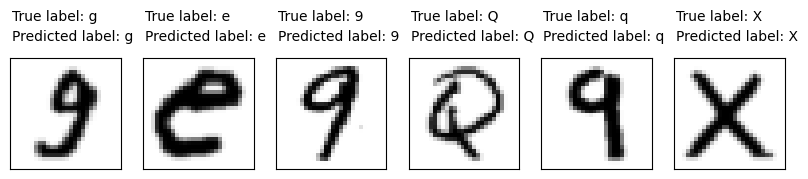

In [26]:
# Predicting the class labels
logit_class_labels = perfect_model_MLP.predict(X_test)
pred_labels = np.argmax(logit_class_labels,axis = 1)
pred_labels

# Plotting
plt.figure(figsize=(10,10))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i],cmap=plt.cm.binary)
  true_label = emnist_mapping[y_test[i]]
  pred_label = emnist_mapping[pred_labels[i]]
  plt.text(0, -10, f'True label: {true_label}')
  plt.text(0, -5, f'Predicted label: {pred_label}')
plt.show()

**Predicting the top six samples with CNN**

588/588 [==============================] - 1s 2ms/step


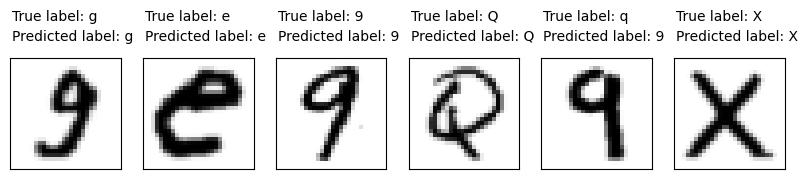

In [27]:
# Predicting the class labels
predictions = perfect_model_CNN.predict(X_test_CNN)
pred_labels_CNN = tf.argmax(predictions,axis = 1).numpy()
pred_labels_CNN

# Plotting
plt.figure(figsize=(10,10))
for i in range(6):
  plt.subplot(1,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test_CNN[i],cmap=plt.cm.binary)
  true_label = emnist_mapping[y_test[i]]
  pred_label = emnist_mapping[pred_labels_CNN[i]]
  plt.text(0, -10, f'True label: {true_label}')
  plt.text(0, -5, f'Predicted label: {pred_label}')
plt.show()

**Confusion Matrix MLP**

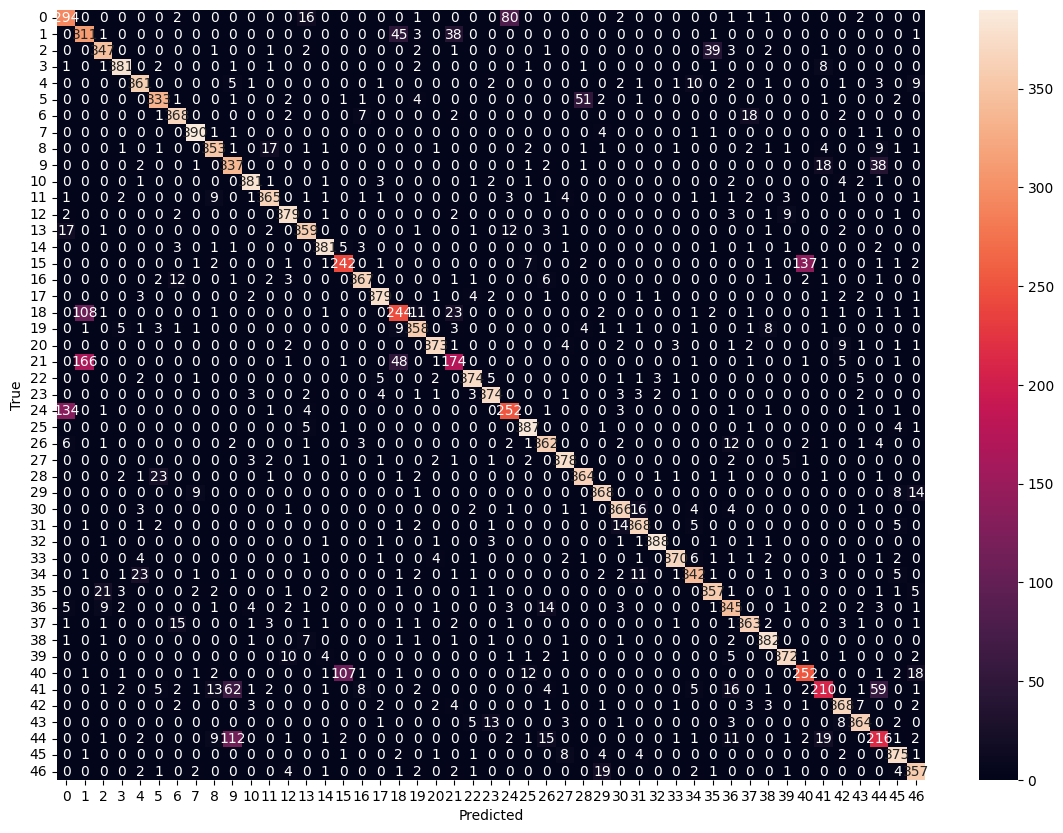

In [22]:
cm_MLP = confusion_matrix(y_test,pred_labels)
plt.figure(figsize = (14,10))
sns.heatmap(cm_MLP, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Confusion Matrix CNN**

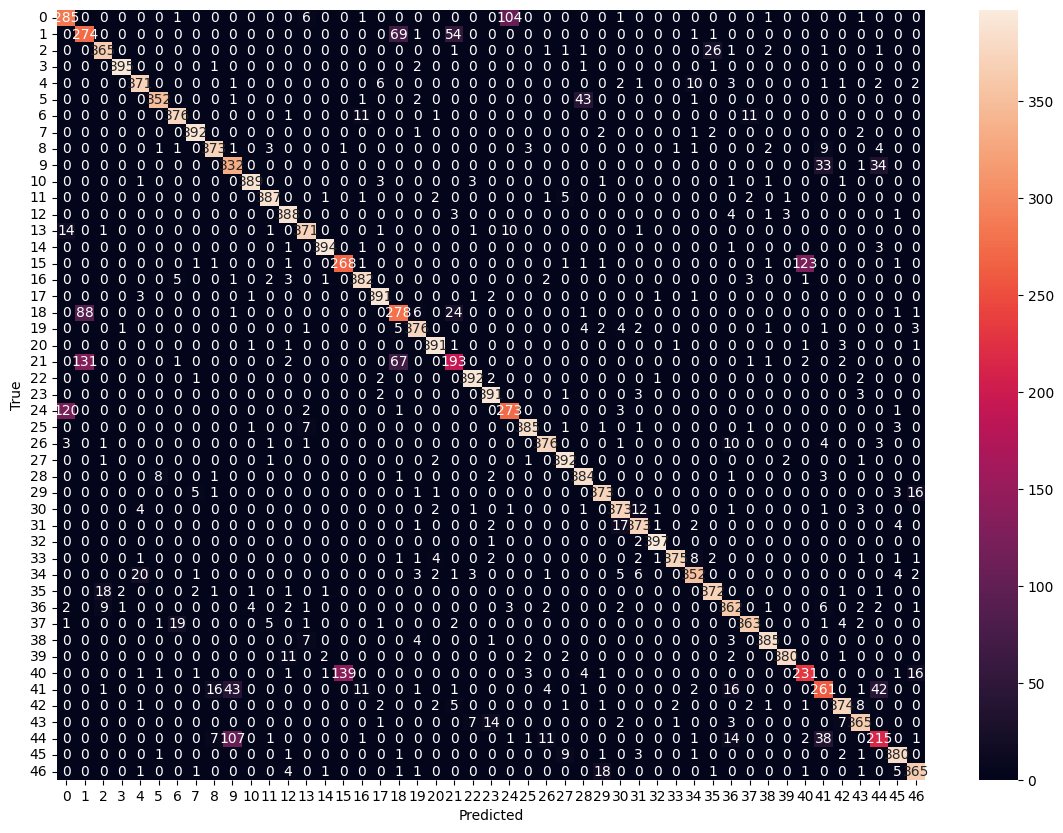

In [23]:
cm_CNN = confusion_matrix(y_test,pred_labels_CNN)
plt.figure(figsize = (14,10))
sns.heatmap(cm_CNN, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Summarizing Performance of MLP and CNN**

In [24]:
#MLP
MLP_accuracy = accuracy_score(y_test,pred_labels)
MLP_precision = precision_score(y_test,pred_labels, average = 'macro')
MLP_recall = recall_score(y_test,pred_labels,average = 'macro')
MLP_f1 = f1_score(y_test,pred_labels,average='macro')

#CNN
CNN_accuracy = accuracy_score(y_test,pred_labels_CNN)
CNN_precision = precision_score(y_test,pred_labels_CNN,average='macro')
CNN_recall = recall_score(y_test,pred_labels_CNN,average='macro')
CNN_f1 = f1_score(y_test,pred_labels_CNN,average='macro')

# Creating dataframe to represent summary
df = pd.DataFrame({
    'MLP' : [MLP_accuracy,MLP_precision,MLP_recall,MLP_f1],
    'CNN': [CNN_accuracy,CNN_precision,CNN_recall,CNN_f1]
},index = ['Accuracy','Precision','Recall','F1-score'])


In [25]:
df

,MLP,CNN
Accuracy,0.858032,0.883617
Precision,0.859878,0.883998
Recall,0.858032,0.883617
F1-score,0.856671,0.882641
